#### CMSE 201 Final Project
### &#9989; Thomas Wierzbicki
### &#9989; Section_002
#### &#9989; 12-1-2019

# __What stat most accuractly predicts the best teams in the NBA?__
## ...And how accurate is it really?
#### By Thomas Wierzbicki for CMSE 201, section 2(Professor Wang).

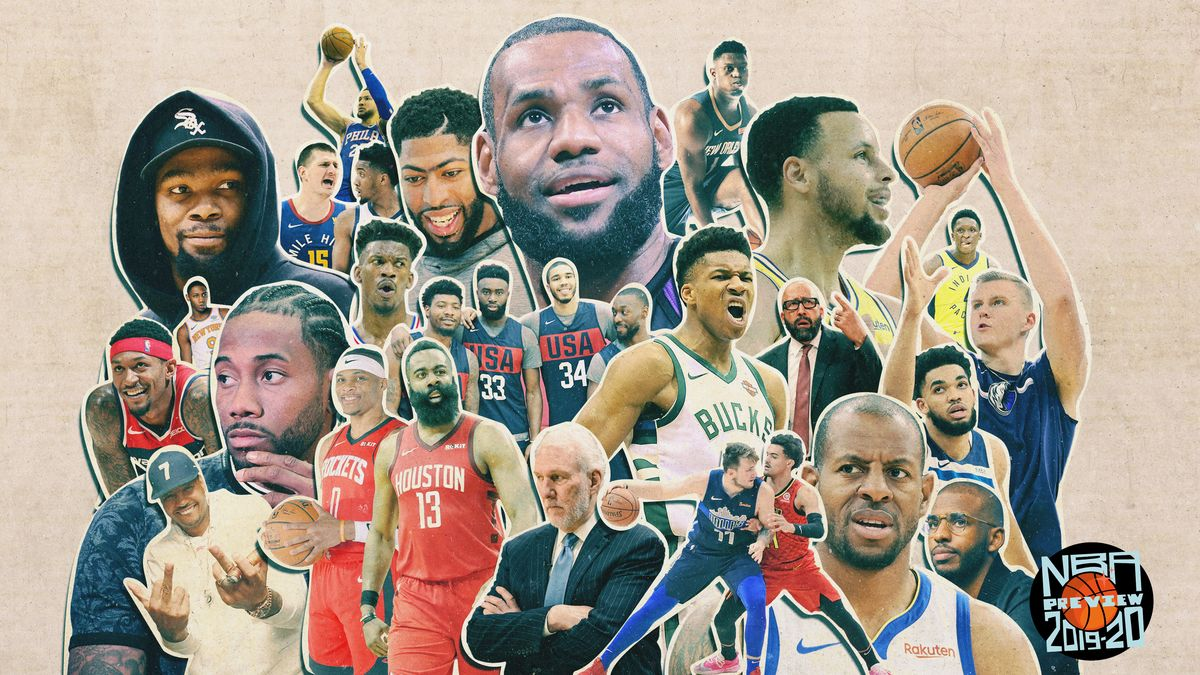

In [149]:
from IPython.display import Image
Image("https://cdn.vox-cdn.com/thumbor/fgJ0yzRw0lHtb-J-jsfHaBi5UB4=/0x0:3200x1800/1200x675/filters:focal(1344x644:1856x1156)/cdn.vox-cdn.com/uploads/chorus_image/image/65299113/nba_season_storylines_BUG.7.jpg")

## Background and Motivation

Basketball is by far one of my favorite sports, and the NBA houses the best basketball entertainment you can get. I love the hard-nose defensive plays, flashy passes, brutal dunks, and amazing players I've watched over many years of being a basketball fan. Due to it's popularity, it took no time for different statistics to get included so that fans could keep track of how good their favorite players were preforming. From points, to rebounds, to assists and steals, there's plenty to dive into, and fans with a knack for numbers continue to develop more efficient ways to keep track of players and their teams.

For my project, I wanted to take a look at all the teams in the league and see if I could use their season stats to predict the top 10 "winningest" teams in the league for a given season. There are alot of stats to look at, and as it is with everything, some stats have more impact than others. I want to know which is more impactful, and use that to see if it's enough to win on it's own.

## Methodology and Code

The most common stats to know(especially important for non-basketball fans) are:
1. Points(amount scored in a game by a player/team)
2. Rebounds(amount of missed shots secured by a player/team)
3. Assists(amount of passes that result in an assist by a player/team)
4. Field Goal percentage(amount of shots made vs missed by a player/team)
5. 3 point percentage(amount of shots made behind the 3-pt line(about 23 ft from the basket) vs missed 3-pt attempts)



*There are the basic stats players and whole teams alike are judged upon. There are others, but they are all mostly related to there stats in some way*

### Part 1: The Data

For this project, I'll be taking all my data from basketball-reference.com, it's a site owned by fans like me who are also really interested in basketball data and analytics and it is updated regularly.

There is so much data to look at, but for this project I will shift my focus to data from the 2018-2019 NBA season. 

Click here to check out the data I'll be using:
[link to basketball-reference data](https://www.basketball-reference.com/leagues/NBA_2018.html?lid=header_seasons#team::none)

In [84]:
#To start we import pandas for dataframes, numpy for any calculations we might need to make, 
#matplotlib for graph, and seaborn for more graph options and better visuals.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading team data from the 2018-2019 season

In [85]:
#now we'll look at data from the 2018-2019 season and use it along with win percentage to find the 
#best stat for predicting the top 10 best teams of that season.

team_stats_18_19 = pd.read_excel('team_stats_18_19.xltx', sheet_name='Worksheet')

team_stats_18_19 
#this includes a wide variety of stats including the ones I mentioned.

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,2.0,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,3.0,New Orleans Pelicans,82,240.9,43.7,92.2,0.473,10.3,29.9,0.344,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,4.0,Philadelphia 76ers*,82,241.5,41.5,88.2,0.471,10.8,30.2,0.359,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,5.0,Los Angeles Clippers*,82,241.8,41.3,87.5,0.471,10.0,25.8,0.388,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1
5,6.0,Portland Trail Blazers*,82,242.1,42.3,90.6,0.467,11.0,30.7,0.359,...,0.814,11.8,36.2,48.0,23.0,6.7,5.0,13.8,20.4,114.7
6,7.0,Oklahoma City Thunder*,82,242.1,42.6,94.0,0.454,11.4,32.6,0.348,...,0.713,12.6,35.5,48.1,23.4,9.3,5.2,14.0,22.4,114.5
7,8.0,Toronto Raptors*,82,242.4,42.2,89.1,0.474,12.4,33.8,0.366,...,0.804,9.6,35.6,45.2,25.4,8.3,5.3,14.0,21.0,114.4
8,9.0,Sacramento Kings,82,240.6,43.2,93.1,0.464,11.3,29.9,0.378,...,0.726,11.0,34.4,45.4,25.4,8.3,4.4,13.4,21.4,114.2
9,10.0,Washington Wizards,82,243.0,42.1,90.1,0.468,11.3,33.3,0.341,...,0.768,9.7,32.7,42.4,26.3,8.3,4.6,14.1,20.7,114.0


#### Cleaning up the dataframe

In [86]:
#Now the data is cleaned up, we don't really need league averages or the rank column

del team_stats_18_19['Rk'] #deletes the rank column
team_stats_18_19.drop(team_stats_18_19.tail(1).index,inplace=True) # drops the last row(league averages)

team_stats_18_19

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,29.9,...,0.773,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1
1,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,30.8,...,0.801,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7
2,New Orleans Pelicans,82,240.9,43.7,92.2,0.473,10.3,29.9,0.344,33.4,...,0.761,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4
3,Philadelphia 76ers*,82,241.5,41.5,88.2,0.471,10.8,30.2,0.359,30.7,...,0.771,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2
4,Los Angeles Clippers*,82,241.8,41.3,87.5,0.471,10.0,25.8,0.388,31.3,...,0.792,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1
5,Portland Trail Blazers*,82,242.1,42.3,90.6,0.467,11.0,30.7,0.359,31.3,...,0.814,11.8,36.2,48.0,23.0,6.7,5.0,13.8,20.4,114.7
6,Oklahoma City Thunder*,82,242.1,42.6,94.0,0.454,11.4,32.6,0.348,31.3,...,0.713,12.6,35.5,48.1,23.4,9.3,5.2,14.0,22.4,114.5
7,Toronto Raptors*,82,242.4,42.2,89.1,0.474,12.4,33.8,0.366,29.8,...,0.804,9.6,35.6,45.2,25.4,8.3,5.3,14.0,21.0,114.4
8,Sacramento Kings,82,240.6,43.2,93.1,0.464,11.3,29.9,0.378,31.9,...,0.726,11.0,34.4,45.4,25.4,8.3,4.4,13.4,21.4,114.2
9,Washington Wizards,82,243.0,42.1,90.1,0.468,11.3,33.3,0.341,30.8,...,0.768,9.7,32.7,42.4,26.3,8.3,4.6,14.1,20.7,114.0


#### Finding the wins vs games played, or win percentage of each team

In [87]:
#There are no win/lose percentages or any records whatsoever regarding win percentage in the dataframe choosen
#despite having all the other necessary statistics, so another dataframe that DOES contain the wins and losses
#is also pulled from the basketball-reference site.

misc_stats_18_19 = pd.read_excel('misc_stats_18_19.xlsx', sheet_name='Sheet1')

#This dataframe includes many more stats, however they are moreso subsidiary information so they won't be used.
misc_stats_18_19

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Offense Four Factors.1,Offense Four Factors.2,Offense Four Factors.3,Defense Four Factors,Defense Four Factors.1,Defense Four Factors.2,Defense Four Factors.3,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%,ORB%,FT/FGA,eFG%,TOV%,DRB%,FT/FGA,Arena,Attend.,Attend./G
1,1,Milwaukee Bucks*,26.9,60,22,61,21,8.87,-0.82,8.04,...,12,20.8,0.197,0.503,11.5,80.3,0.162,Fiserv Forum,721692,17602
2,2,Golden State Warriors*,28.4,57,25,56,26,6.46,-0.04,6.42,...,12.6,22.5,0.182,0.508,11.7,77.1,0.205,Oracle Arena,803436,19596
3,3,Toronto Raptors*,27.3,58,24,56,26,6.09,-0.6,5.49,...,12.4,21.9,0.198,0.509,13.1,77.1,0.19,Scotiabank Arena,812822,19825
4,4,Utah Jazz*,27.3,50,32,54,28,5.26,0.03,5.28,...,13.4,22.9,0.217,0.507,12.4,80.3,0.189,Vivint Smart Home Arena,750546,18306
5,5,Houston Rockets*,29.2,53,29,53,29,4.77,0.19,4.96,...,12,22.8,0.221,0.525,13.4,74.4,0.21,Toyota Center,740392,18058
6,6,Portland Trail Blazers*,26.2,53,29,51,31,4.2,0.24,4.43,...,12.1,26.6,0.21,0.516,11,77.9,0.195,Moda Center,799345,19496
7,7,Denver Nuggets*,24.9,54,28,51,31,3.95,0.24,4.19,...,11.9,26.6,0.175,0.521,12.3,78,0.194,Pepsi Center,756457,18450
8,8,Boston Celtics*,25.7,49,33,52,30,4.44,-0.54,3.9,...,11.5,21.6,0.173,0.514,13.4,77,0.198,TD Garden,763584,18624
9,9,Oklahoma City Thunder*,25.7,49,33,50,32,3.4,0.15,3.56,...,11.7,26,0.19,0.523,14.4,78.2,0.206,Chesapeake Energy Arena,746323,18203


#### Cleaning up the dataframe pt.2

In [88]:
#The headers on this dataframe are not the actual headers of the data, so we need to 
#delete the current headers and replace them with the first row strings.
new_header = misc_stats_18_19.iloc[0] #makes a new set of values equal to the first row(true headers)
misc_stats_18_19.columns = new_header #sets column headers equal to list of proper headers
misc_stats_18_19 = misc_stats_18_19[1:] #gets rid of the first row of the dataframe

#we use the same process as the other dataframe to delete the bottom row and ranking column
del misc_stats_18_19['Rk']

misc_stats_18_19.drop(misc_stats_18_19.tail(1).index,inplace=True)

In [89]:


#next, we take the win column, and divide it by the number of games in a season, 82. Then, we get a percentage
#we add this "win percentage" value as a new column of values for each team
misc_stats_18_19['Win%'] = (misc_stats_18_19['W']/82)*100 #calulates the win percentage and adds the new column

misc_stats_18_19.index = range(30) #resets index to start at 0 again

misc_stats_18_19 #now, this dataframe is ready to be worked on

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,ORB%,FT/FGA,eFG%,TOV%,DRB%,FT/FGA,Arena,Attend.,Attend./G,Win%
0,Milwaukee Bucks*,26.9,60,22,61,21,8.87,-0.82,8.04,113.8,...,20.8,0.197,0.503,11.5,80.3,0.162,Fiserv Forum,721692,17602,73.1707
1,Golden State Warriors*,28.4,57,25,56,26,6.46,-0.04,6.42,115.9,...,22.5,0.182,0.508,11.7,77.1,0.205,Oracle Arena,803436,19596,69.5122
2,Toronto Raptors*,27.3,58,24,56,26,6.09,-0.6,5.49,113.1,...,21.9,0.198,0.509,13.1,77.1,0.19,Scotiabank Arena,812822,19825,70.7317
3,Utah Jazz*,27.3,50,32,54,28,5.26,0.03,5.28,110.9,...,22.9,0.217,0.507,12.4,80.3,0.189,Vivint Smart Home Arena,750546,18306,60.9756
4,Houston Rockets*,29.2,53,29,53,29,4.77,0.19,4.96,115.5,...,22.8,0.221,0.525,13.4,74.4,0.21,Toyota Center,740392,18058,64.6341
5,Portland Trail Blazers*,26.2,53,29,51,31,4.2,0.24,4.43,114.7,...,26.6,0.21,0.516,11,77.9,0.195,Moda Center,799345,19496,64.6341
6,Denver Nuggets*,24.9,54,28,51,31,3.95,0.24,4.19,113,...,26.6,0.175,0.521,12.3,78,0.194,Pepsi Center,756457,18450,65.8537
7,Boston Celtics*,25.7,49,33,52,30,4.44,-0.54,3.9,112.2,...,21.6,0.173,0.514,13.4,77,0.198,TD Garden,763584,18624,59.7561
8,Oklahoma City Thunder*,25.7,49,33,50,32,3.4,0.15,3.56,110.3,...,26,0.19,0.523,14.4,78.2,0.206,Chesapeake Energy Arena,746323,18203,59.7561
9,Indiana Pacers*,27,48,34,50,32,3.33,-0.57,2.76,109.9,...,21.9,0.182,0.516,14.1,76.2,0.184,Bankers Life Fieldhouse,689310,16812,58.5366


#### Appending the win percentage column

In [90]:
#We have the win percentage data, but not in the dataframe we want to use, so we need to reindex the teams to match
#the team order in the misc_stats dataframe so the win% order is correct and then append the win percentages
team_stats_18_19 = team_stats_18_19.set_index('Team')#set the index of team_stats to be based on the "team" column.
team_stats_18_19 = team_stats_18_19.reindex(index=misc_stats_18_19['Team'])#reindexes based on misc_stats' order.
team_stats_18_19 = team_stats_18_19.reset_index()#keeps the new order but returns to using the numbered index.

team_stats_18_19['Win%'] = misc_stats_18_19['Win%']#appends the win% column.

team_stats_18_19


,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Win%
0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,29.9,...,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1,73.1707
1,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,30.8,...,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7,69.5122
2,Toronto Raptors*,82,242.4,42.2,89.1,0.474,12.4,33.8,0.366,29.8,...,9.6,35.6,45.2,25.4,8.3,5.3,14.0,21.0,114.4,70.7317
3,Utah Jazz*,82,240.9,40.4,86.4,0.468,12.1,34.0,0.356,28.3,...,10.0,36.4,46.4,26.0,8.1,5.9,15.1,21.1,111.7,60.9756
4,Houston Rockets*,82,241.8,39.2,87.4,0.449,16.1,45.4,0.356,23.1,...,10.2,31.9,42.1,21.2,8.5,4.9,13.3,22.0,113.9,64.6341
5,Portland Trail Blazers*,82,242.1,42.3,90.6,0.467,11.0,30.7,0.359,31.3,...,11.8,36.2,48.0,23.0,6.7,5.0,13.8,20.4,114.7,64.6341
6,Denver Nuggets*,82,240.6,41.9,90.0,0.466,11.0,31.4,0.351,30.9,...,11.9,34.5,46.4,27.4,7.7,4.4,13.4,20.0,110.7,65.8537
7,Boston Celtics*,82,241.2,42.1,90.5,0.465,12.6,34.5,0.365,29.5,...,9.8,34.7,44.5,26.3,8.6,5.3,12.8,20.4,112.4,59.7561
8,Oklahoma City Thunder*,82,242.1,42.6,94.0,0.454,11.4,32.6,0.348,31.3,...,12.6,35.5,48.1,23.4,9.3,5.2,14.0,22.4,114.5,59.7561
9,Indiana Pacers*,82,240.3,41.3,87.0,0.475,9.5,25.4,0.374,31.8,...,9.3,33.7,43.0,26.0,8.7,4.9,13.7,19.4,108.0,58.5366


#### coorelation

In [100]:
#Now that the team_stats dataframe is formatted how we want, we want to use the corr() function to find the 
#stats with best coorelation with a team's win percentage.

#The win% column is not the same value type as other data in the dataframe, so we need to change it to float64
team_stats_18_19['Win%'] = team_stats_18_19['Win%'].astype('float64') #now all data is the same type

#we make a dataframe out of all the correlating data
corr_data = team_stats_18_19.corr()


#drop last row since correlation with win% and itself is 1.0
corr_data.drop(corr_data.tail(1).index,inplace=True) 

# now we can see the stats with the greatest positive coorelation with win percenatage
corr_data = corr_data.sort_values(by=['Win%'], ascending=False)

corr_data['Win%'] #we now have the correlation data from greatest to least with respect to win percentage


PTS    0.660721
FG%    0.610833
2P%    0.600940
DRB    0.574518
3P%    0.541860
TRB    0.529092
FG     0.522569
AST    0.498075
3P     0.487222
BLK    0.435103
3PA    0.312689
FGA    0.167096
FT%    0.161161
FT     0.129156
STL    0.098942
ORB    0.080101
2P     0.067392
FTA    0.057795
MP    -0.142364
PF    -0.163902
2PA   -0.220603
TOV   -0.246058
G           NaN
Name: Win%, dtype: float64

In [159]:
corr_data

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Win%
PTS,NaN,0.058697,0.818591,0.594282,0.671528,0.458536,0.331262,0.384484,0.314891,-0.040277,...,0.194758,0.566504,0.575579,0.561713,0.169321,0.401427,0.082858,0.127792,1.000000,0.660721
FG%,NaN,-0.192015,0.822715,0.197078,1.000000,-0.020441,-0.187987,0.544866,0.648795,0.270434,...,-0.264446,0.513184,0.316499,0.785258,0.150313,0.481998,0.014316,-0.146340,0.671528,0.610833
2P%,NaN,-0.026305,0.557433,0.142628,0.672242,0.555226,0.525466,0.045875,0.043756,-0.431528,...,-0.186110,0.443964,0.293328,0.624012,0.284877,0.556569,0.203589,0.026836,0.693493,0.600940
DRB,NaN,-0.192551,0.553682,0.318446,0.513184,0.177544,0.094714,0.246658,0.303325,0.058271,...,0.066083,1.000000,0.883970,0.460039,-0.269529,0.513028,0.141125,-0.209764,0.566504,0.574518
3P%,NaN,-0.209316,0.402057,0.032317,0.544866,0.072029,-0.225082,1.000000,0.263874,0.225854,...,-0.159269,0.246658,0.138019,0.279528,-0.164332,0.046245,-0.369766,-0.181946,0.384484,0.541860
TRB,NaN,-0.214362,0.541392,0.543061,0.316499,0.217172,0.165934,0.138019,0.267576,0.094543,...,0.524778,0.883970,1.000000,0.376824,-0.230169,0.347111,0.189166,-0.080088,0.575579,0.529092
FG,NaN,-0.147997,1.000000,0.718611,0.822715,0.069117,-0.061018,0.402057,0.724023,0.391575,...,0.143587,0.553682,0.541392,0.725949,0.213256,0.400226,0.020165,-0.092350,0.818591,0.522569
AST,NaN,-0.234899,0.725949,0.299170,0.785258,0.096410,-0.000177,0.279528,0.493479,0.141374,...,-0.036500,0.460039,0.376824,1.000000,0.260832,0.557422,0.189836,-0.058726,0.561713,0.498075
3P,NaN,0.095908,0.069117,0.154793,-0.020441,1.000000,0.954695,0.072029,-0.637940,-0.836068,...,0.138928,0.177544,0.217172,0.096410,0.113613,0.199561,0.007854,0.132406,0.458536,0.487222
BLK,NaN,-0.112927,0.400226,0.107028,0.481998,0.199561,0.166515,0.046245,0.172035,-0.109264,...,-0.182931,0.513028,0.347111,0.557422,0.352897,1.000000,0.208608,0.086103,0.401427,0.435103


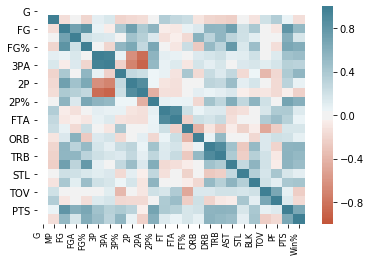

In [110]:
#This heatmap gives a better visual to the dataframe above, the more turqoise the blocks are, the stronger the
#coorelation. The more red it is, the more negative, while white is neutral.

corr = team_stats_18_19.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square= False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    size=8,
    horizontalalignment='right'
);

We will take the top five values in the coorelation dataframe, which are also shown as the darkest squares in the heatmap. They are:
1. points(PTS)
2. field goal percentage(FG%)
3. field goal percentage(FG%)
4. defensive rebounds(DRB)
5. 3-point percentage(3P%)

#### Predictions:
##### Make the best teams dataframe

In [125]:
#Now we will compare how accurately we can predict the best teams of the 2018-2019 season based on 
#the different stats we have in our main dataframe, team_data_18_19

#The list of teams with the most wins from last season can be recreated
#by organizing the team_stats dataframe by highest to lowest win percentage.

standings = team_stats_18_19.sort_values(by=['Win%'], ascending=False)

standings.index = range(30)

standings

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Win%
0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,29.9,...,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1,73.170732
1,Toronto Raptors*,82,242.4,42.2,89.1,0.474,12.4,33.8,0.366,29.8,...,9.6,35.6,45.2,25.4,8.3,5.3,14.0,21.0,114.4,70.731707
2,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,30.8,...,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7,69.512195
3,Denver Nuggets*,82,240.6,41.9,90.0,0.466,11.0,31.4,0.351,30.9,...,11.9,34.5,46.4,27.4,7.7,4.4,13.4,20.0,110.7,65.853659
4,Houston Rockets*,82,241.8,39.2,87.4,0.449,16.1,45.4,0.356,23.1,...,10.2,31.9,42.1,21.2,8.5,4.9,13.3,22.0,113.9,64.634146
5,Portland Trail Blazers*,82,242.1,42.3,90.6,0.467,11.0,30.7,0.359,31.3,...,11.8,36.2,48.0,23.0,6.7,5.0,13.8,20.4,114.7,64.634146
6,Philadelphia 76ers*,82,241.5,41.5,88.2,0.471,10.8,30.2,0.359,30.7,...,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2,62.195122
7,Utah Jazz*,82,240.9,40.4,86.4,0.468,12.1,34.0,0.356,28.3,...,10.0,36.4,46.4,26.0,8.1,5.9,15.1,21.1,111.7,60.975610
8,Oklahoma City Thunder*,82,242.1,42.6,94.0,0.454,11.4,32.6,0.348,31.3,...,12.6,35.5,48.1,23.4,9.3,5.2,14.0,22.4,114.5,59.756098
9,Boston Celtics*,82,241.2,42.1,90.5,0.465,12.6,34.5,0.365,29.5,...,9.8,34.7,44.5,26.3,8.6,5.3,12.8,20.4,112.4,59.756098


##### make a test dataframe

In [126]:
#to test our idea, we'll take the team_stats dataframe and organize it from greatest to least based on points.

standings_by_pts = team_stats_18_19.sort_values(by=['PTS'], ascending=False)

standings_by_pts.index = range(30)

standings_by_pts

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Win%
0,Milwaukee Bucks*,82,241.2,43.4,91.1,0.476,13.5,38.2,0.353,29.9,...,9.3,40.4,49.7,26.0,7.5,5.9,13.9,19.6,118.1,73.170732
1,Golden State Warriors*,82,241.5,44.0,89.8,0.491,13.3,34.4,0.385,30.8,...,9.7,36.5,46.2,29.4,7.6,6.4,14.3,21.4,117.7,69.512195
2,New Orleans Pelicans,82,240.9,43.7,92.2,0.473,10.3,29.9,0.344,33.4,...,11.1,36.2,47.3,27.0,7.4,5.4,14.8,21.1,115.4,40.243902
3,Philadelphia 76ers*,82,241.5,41.5,88.2,0.471,10.8,30.2,0.359,30.7,...,10.9,36.9,47.8,26.9,7.4,5.3,14.9,21.3,115.2,62.195122
4,Los Angeles Clippers*,82,241.8,41.3,87.5,0.471,10.0,25.8,0.388,31.3,...,9.7,35.8,45.5,24.0,6.8,4.7,14.5,23.3,115.1,58.536585
5,Portland Trail Blazers*,82,242.1,42.3,90.6,0.467,11.0,30.7,0.359,31.3,...,11.8,36.2,48.0,23.0,6.7,5.0,13.8,20.4,114.7,64.634146
6,Oklahoma City Thunder*,82,242.1,42.6,94.0,0.454,11.4,32.6,0.348,31.3,...,12.6,35.5,48.1,23.4,9.3,5.2,14.0,22.4,114.5,59.756098
7,Toronto Raptors*,82,242.4,42.2,89.1,0.474,12.4,33.8,0.366,29.8,...,9.6,35.6,45.2,25.4,8.3,5.3,14.0,21.0,114.4,70.731707
8,Sacramento Kings,82,240.6,43.2,93.1,0.464,11.3,29.9,0.378,31.9,...,11.0,34.4,45.4,25.4,8.3,4.4,13.4,21.4,114.2,47.560976
9,Washington Wizards,82,243.0,42.1,90.1,0.468,11.3,33.3,0.341,30.8,...,9.7,32.7,42.4,26.3,8.3,4.6,14.1,20.7,114.0,39.024390


In [124]:
#then, we run a loop to go down the team columns in both dataframes and see how many rows match
# it then finds the accuracy of the specific-stat-predicted standing
correct_guesses = 0

for i in range(len(standings)):
    if standings['Team'].loc[i] == standings_by_pts['Team'].loc[i]:
        correct_guesses += 1
        
print('The standings prediction using points was', round((correct_guesses/len(standings))*100,1), "percent correct.")
correct_guesses

The standings prediction using points was 16.7 percent correct.


5

In [157]:
#The method got the result we wanted, but we don't need to keep changing the one dataframe everytime.
#To test the rest of the stats we create a function to test accuracy of predictions based on certain stats
#much quicker than doing it one at a time.

def best_guess(colname, standings): #only input is a list of strings for all the column names
    standings_test_stat = standings.sort_values(by=[colname], ascending=False)#sorts dataframe by a stat
    standings_test_stat.index = range(len(standings_test_stat))  #resets index
        
        
        
    correct_guesses = 0 #initial values

    for i in range(len(standings_test_stat)): #loop runs length of top 10 dataframes
        if standings['Team'].loc[i] == standings_test_stat['Team'].loc[i]:#checks if cooresponding rows are equal
            correct_guesses += 1 #increases number of correct guesses if it's correct
    #returns a loop that calulates the percentage of accuracy of the stat in predicting the top 10 teams.
    return print('The standings prediction using', colname,'was', round((correct_guesses/len(standings_test_stat))*100,1), "percent correct.")
    

In [158]:
#tests all the other stats using the function and a loop

othercols = [] 
for col in team_stats_18_19.columns: #appends all column names to a list
    othercols.append(col)
othercols.remove('Win%') #comparing to win percentage would be redundent


for col in othercols: #tests the function with every stat in the list
    best_guess(col, standings)


The standings prediction using Team was 3.3 percent correct.
The standings prediction using G was 13.3 percent correct.
The standings prediction using MP was 0.0 percent correct.
The standings prediction using FG was 0.0 percent correct.
The standings prediction using FGA was 0.0 percent correct.
The standings prediction using FG% was 6.7 percent correct.
The standings prediction using 3P was 6.7 percent correct.
The standings prediction using 3PA was 3.3 percent correct.
The standings prediction using 3P% was 6.7 percent correct.
The standings prediction using 2P was 3.3 percent correct.
The standings prediction using 2PA was 0.0 percent correct.
The standings prediction using 2P% was 13.3 percent correct.
The standings prediction using FT was 3.3 percent correct.
The standings prediction using FTA was 3.3 percent correct.
The standings prediction using FT% was 0.0 percent correct.
The standings prediction using ORB was 3.3 percent correct.
The standings prediction using DRB was 20.0 

In [ ]:
#using the data from our function, we see that the defensive rebounds stat provided the most accurate 
#prediction of top 10 teams from last season.

### Additional visuals and best fit
We are now set on defensive rebounds as our main stat, but let's take a quick look at it's graph and add a best fit line to further prove our point.

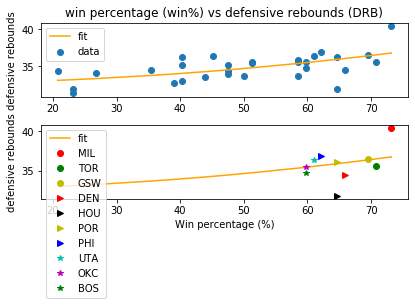

In [147]:
#make x and y the win% data and defensive rebound data
x = standings['Win%'].tolist()
y = standings['DRB'].tolist()

poly_parameters = np.polyfit(x, y, 2) #use polyfit to get the best fit coefficients


my_poly_function = np.poly1d(poly_parameters) #get the equation with poly1d

expected_y_poly = my_poly_function(x) #plug in the x values to get the best fit y data

fig, ax = plt.subplots(2,1) #create a subplot for all the points and the top-10 teams for comparison

#graph 1 with all data points
ax[0].scatter(x, y, label = "data") #all 30 teams
ax[0].plot(x, expected_y_poly, color = "orange", label = "fit") #the best fit line

ax[0].legend()
ax[0].set_ylabel('defensive rebounds')
ax[0].set_title('win percentage (win%) vs defensive rebounds (DRB)')

#graph 2 with the top 10 "winningest teams" all individually plotted
ax[1].plot(x, expected_y_poly, color = "orange", label = "fit") #best fit
ax[1].plot(standings['Win%'].loc[0], standings['DRB'].loc[0], "ro", label = "MIL") #Milwaukee Bucks
ax[1].plot(standings['Win%'].loc[1], standings['DRB'].loc[1], "go", label = "TOR") #Toronto Raptors
ax[1].plot(standings['Win%'].loc[2], standings['DRB'].loc[2], "yo", label = "GSW") #Golden State Warriors
ax[1].plot(standings['Win%'].loc[3], standings['DRB'].loc[3], "r>", label = "DEN") #Denver Nuggets
ax[1].plot(standings['Win%'].loc[4], standings['DRB'].loc[4], "k>", label = "HOU") #Houston Rockets
ax[1].plot(standings['Win%'].loc[5], standings['DRB'].loc[5], "y>", label = "POR") #Portland Trailblazers
ax[1].plot(standings['Win%'].loc[6], standings['DRB'].loc[6], "b>", label = "PHI") #Philadelphia 76ers
ax[1].plot(standings['Win%'].loc[7], standings['DRB'].loc[7], "c*", label = "UTA") #Utah Jazz
ax[1].plot(standings['Win%'].loc[8], standings['DRB'].loc[8], "m*", label = "OKC") #Oklahoma City Thunder
ax[1].plot(standings['Win%'].loc[9], standings['DRB'].loc[9], "g*", label = "BOS") #Boston Celtics

ax[1].legend()
ax[1].set_xlabel('Win percentage (%)')
ax[1].set_ylabel('defensive rebounds')

fig.tight_layout()

#generally, those with higher win percentages have higher team assist per game numbers, meaning 
#they spread the floor well and pass often.
#Assists does not account for all passes but in general shows efficient passing.

## Results
When analyzing the coorelation between other stats and win percentage, the top five were:
1. points(PTS)
2. field goal percentage(FG%)
3. field goal percentage(FG%)
4. defensive rebounds(DRB)
5. 3-point percentage(3P%)

as shown in the reorganized correlation column relative to win percentage and the heatmap plotted.

PTS    0.660721
FG%    0.610833
2P%    0.600940
DRB    0.574518
3P%    0.541860
TRB    0.529092
FG     0.522569
AST    0.498075
3P     0.487222
BLK    0.435103
3PA    0.312689
FGA    0.167096
FT%    0.161161
FT     0.129156
STL    0.098942
ORB    0.080101
2P     0.067392
FTA    0.057795
MP    -0.142364
PF    -0.163902
2PA   -0.220603
TOV   -0.246058
G           NaN
Name: Win%, dtype: float64


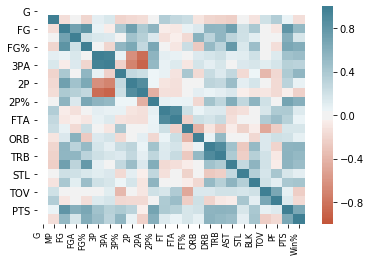

In [156]:
print(corr_data['Win%']) #win% and all other stats coorelations ranked greatest to least

corr = team_stats_18_19.corr() # heat map modeling same coorelations as the column
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square= False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    size=8,
    horizontalalignment='right'
);

After discovering the top 5 stats to use, we then used them to predict the best teams in the league using those stats, they were then compared to the actually best teams from the 2018-2019 season.

In [143]:
for col in othercols: #uses my best_guess function to see which stat gives the best predicition.
    best_guess(col, standings)

The standings prediction using Team was 3.3 percent correct.
The standings prediction using G was 3.3 percent correct.
The standings prediction using MP was 0.0 percent correct.
The standings prediction using FG was 0.0 percent correct.
The standings prediction using FGA was 0.0 percent correct.
The standings prediction using FG% was 3.3 percent correct.
The standings prediction using 3P was 6.7 percent correct.
The standings prediction using 3PA was 3.3 percent correct.
The standings prediction using 3P% was 3.3 percent correct.
The standings prediction using 2P was 0.0 percent correct.
The standings prediction using 2PA was 0.0 percent correct.
The standings prediction using 2P% was 13.3 percent correct.
The standings prediction using FT was 0.0 percent correct.
The standings prediction using FTA was 0.0 percent correct.
The standings prediction using FT% was 0.0 percent correct.
The standings prediction using ORB was 3.3 percent correct.
The standings prediction using DRB was 20.0 p

Looking at all the results of the predictions, we see that defensive rebounds (DRB) acheived the highest accuracy percentage at 20%, with assists (AST) and points (PTS) tied for second best. We then provide another plot to futher show the accuracy of denfensive rebounds and win percentage.

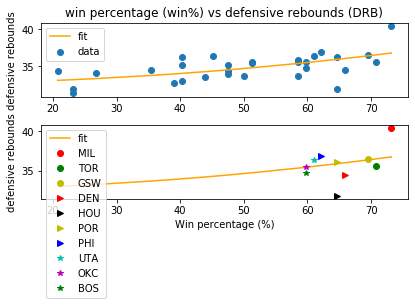

In [145]:
fig, ax = plt.subplots(2,1) #create a subplot for all the points and the top-10 teams for comparison

#graph 1 with all data points
ax[0].scatter(x, y, label = "data") #all 30 teams
ax[0].plot(x, expected_y_poly, color = "orange", label = "fit") #the best fit line

ax[0].legend()
ax[0].set_ylabel('defensive rebounds')
ax[0].set_title('win percentage (win%) vs defensive rebounds (DRB)')

#graph 2 with the top 10 "winningest teams" all individually plotted
ax[1].plot(x, expected_y_poly, color = "orange", label = "fit") #best fit
ax[1].plot(standings['Win%'].loc[0], standings['DRB'].loc[0], "ro", label = "MIL") #Milwaukee Bucks
ax[1].plot(standings['Win%'].loc[1], standings['DRB'].loc[1], "go", label = "TOR") #Toronto Raptors
ax[1].plot(standings['Win%'].loc[2], standings['DRB'].loc[2], "yo", label = "GSW") #Golden State Warriors
ax[1].plot(standings['Win%'].loc[3], standings['DRB'].loc[3], "r>", label = "DEN") #Denver Nuggets
ax[1].plot(standings['Win%'].loc[4], standings['DRB'].loc[4], "k>", label = "HOU") #Houston Rockets
ax[1].plot(standings['Win%'].loc[5], standings['DRB'].loc[5], "y>", label = "POR") #Portland Trailblazers
ax[1].plot(standings['Win%'].loc[6], standings['DRB'].loc[6], "b>", label = "PHI") #Philadelphia 76ers
ax[1].plot(standings['Win%'].loc[7], standings['DRB'].loc[7], "c*", label = "UTA") #Utah Jazz
ax[1].plot(standings['Win%'].loc[8], standings['DRB'].loc[8], "m*", label = "OKC") #Oklahoma City Thunder
ax[1].plot(standings['Win%'].loc[9], standings['DRB'].loc[9], "g*", label = "BOS") #Boston Celtics

ax[1].legend()
ax[1].set_xlabel('Win percentage (%)')
ax[1].set_ylabel('defensive rebounds')

fig.tight_layout()

The graphs show a high positive correlation all the way through the graph. When graphing only the 10 best teams, we see that ,outside from two outliers, the points representing each team hug the highest end of the curve, because they have some of the highest rebounding averages in the league.

## Discussion and Conclusion:

While points scored seems like the most influential stat (scoring points wins games, right?) and while it most definitely has a great effect, it is not the best stat for determining wins. Based on the data I have found, defensive rebounds seems to be the best way to determine who will accumulate the most wins in a season. I also learned that there are other stats close in prediction accuracy I could use for decent data.

I had a tough time getting the dataframes properly cleaned up, it can be quite meticulous and it can mess your data up, so I had to make sure that didn't happen. Along with that, I was unsuccessful in preforming a chi-squared calculation for my graph data. My inital plan was to graph every stat vs the win percetage and calculate the error with the chi-squared method, but instead I had to find a way around it. Using the correlation, .corr(), function and making my own prediction function, I found the best fitting data by a different method.

Before I decided to search for the best stat, my initial idea was to chose a single stat and analyse why it worked or didn't work the best. The stat I planned to choose was rebounding, as the old saying goes, "The team the controls the rebounds, controls the game." Funnily enough, rebounds was the stat that got chosen, specificly denfensive rebounds. This slight difference is due to the fact that about 80% of total rebounds ARE defensive rebounds, so it has the most effect. However, at 20% accuracy, it doesn't seem to have enough effect to be an efficent predictor.

The reason for this may be as simple as that one stat isn't a surefire way to predict how good a team will be, or maybe it means that simple stats just don't give enough information about how good a team actually is. More complex stats like the player efficiency rating (PER), try to use all data about a player's contribution to a team to figure out how efficent they really are on the court. 

Regardless, of the true reason, we've learned that no simple stat accurately predicts win percentage, but if one is to choose a stat to use, **defensive rebounds** gaurantees the best prediction possible.

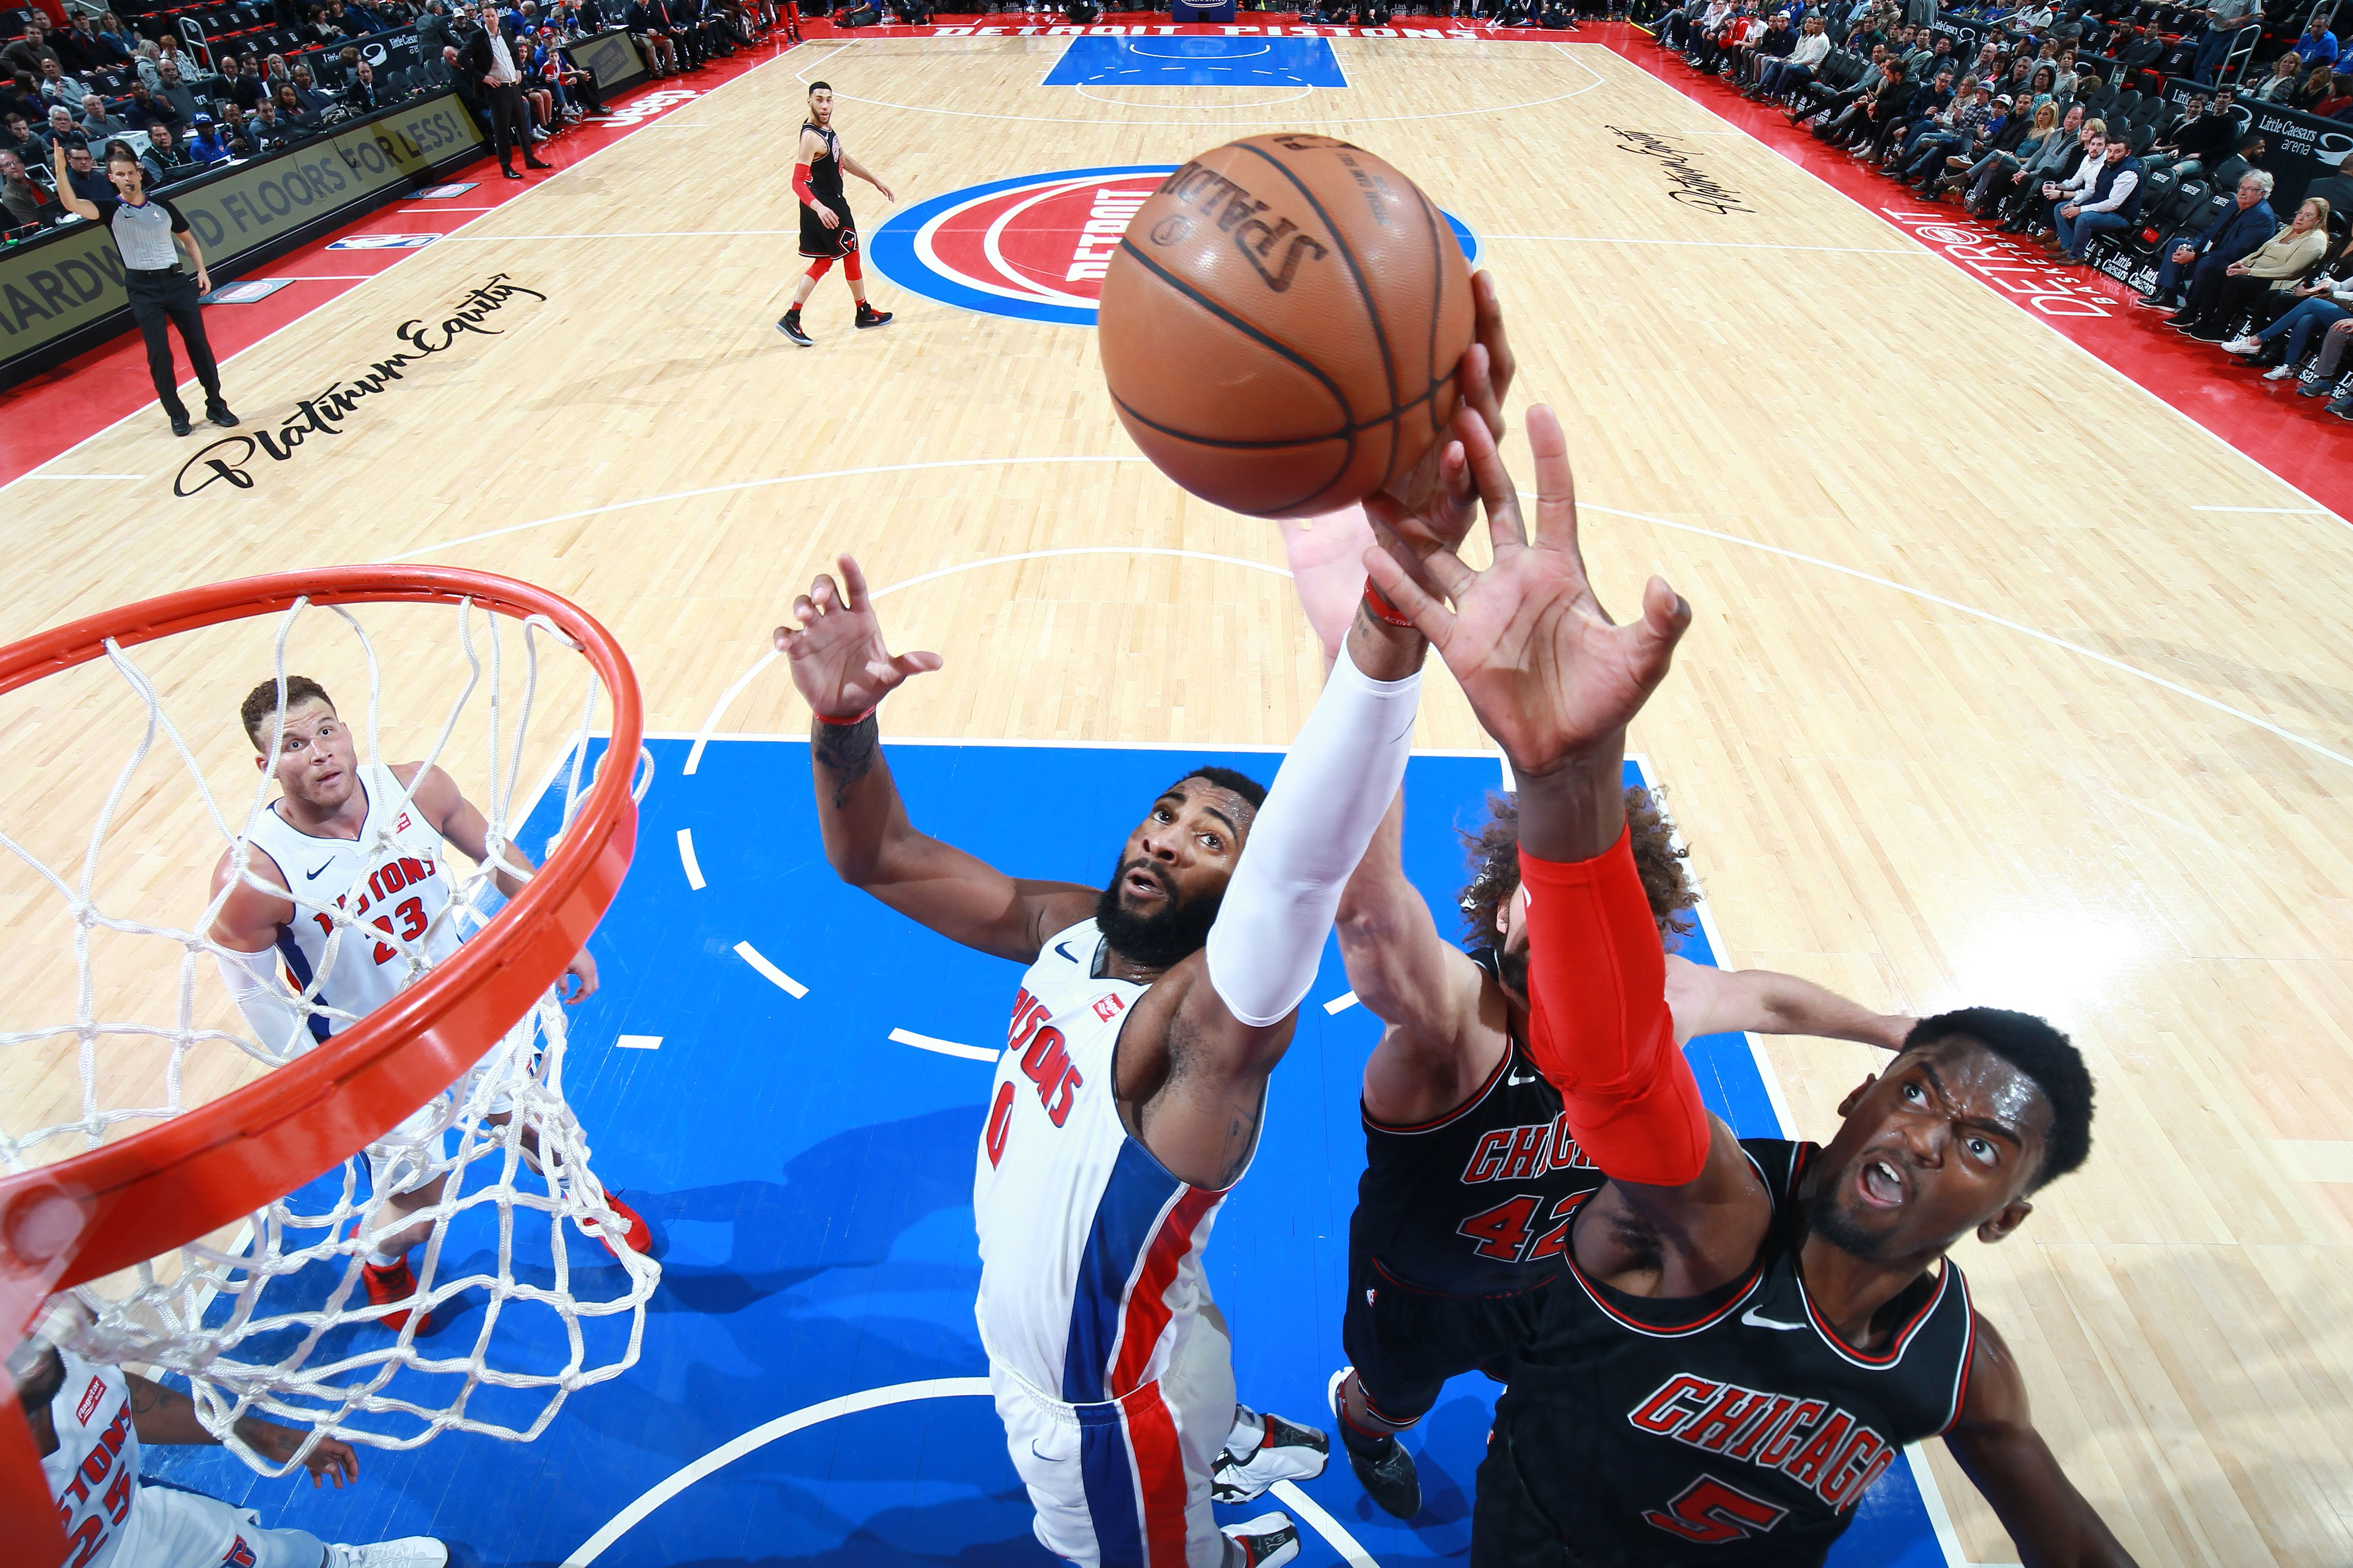

In [155]:
Image("https://imagesvc.timeincapp.com/v3/fan/image?url=https%3A%2F%2Fpistonpowered.com%2Fwp-content%2Fuploads%2Fgetty-images%2F2018%2F03%2F937524588-chicago-bulls-v-detroit-pistons.jpg.jpg")

### References

-“2017-18 NBA Season Summary.” Basketball, www.basketball-reference.com/leagues/NBA_2018.html?lid=header_seasons#team::none.

-Sanchez, Oscar. “Basketball Analytics: Predicting Win Shares.” Medium, Towards Data Science, 15 Feb. 2019, towardsdatascience.com/basketball-analytics-predicting-win-shares-7c155651e7cc.